In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from ultron.factor.fitness.metrics import Metrics
from ultron.factor.fitness.state import State

In [3]:
import pandas as pd

In [4]:
from kdutils.data import fetch_base

In [5]:
base = '/mnt/nass125/data/basic_data/dx_data/dubhe'

In [6]:
path1 = 'envoy0003_transient_hybrid_transformer_3p_2s_ranking_5h_dubhe_hs300_10c'
dirs = os.path.join(base, os.environ['DUMMY_NAME'], 'Timing', 
            path1)

In [7]:
filename = os.path.join(dirs, "envoy0003_factors.feather")
factors_data = pd.read_feather(filename)

In [8]:
begin_date = factors_data['trade_time'].min().strftime('%Y-%m-%d')
end_date = factors_data['trade_time'].max().strftime('%Y-%m-%d')

In [9]:
remain_data = fetch_base(begin_date, end_date)
ret_data = remain_data['ret_f1r_cc']
dummy120_fst = remain_data['dummy120_fst']
dummy120_fst_close = remain_data['dummy120_fst_close']
hs300 = remain_data['hs300']
zz1000 = remain_data['zz1000']
zz500 = remain_data['zz500']

2024-12-16 16:43:29,910 - kd - INFO - fetching load ret_f1r_cc data
2024-12-16 16:43:29,913 - kd - INFO - sql:select ret_f1r_cc,trade_date,code from loadTable('dfs://StkRet',`stk_ret) where 1==1 and date(trade_date)>= 2023.05.29 and date(trade_date)<= 2024.09.09 and Flag= 1
2024-12-16 16:43:40,585 - kd - INFO - fetching load dummy120_fst data
2024-12-16 16:43:40,590 - kd - INFO - sql:select dummy120_fst,trade_date,code from loadTable('dfs://StkUniverse',`stk_universe) where 1==1 and date(trade_date)>= 2023.05.29 and date(trade_date)<= 2024.09.09 and Flag= 1
2024-12-16 16:43:42,641 - kd - INFO - fetching load dummy120_fst_close data
2024-12-16 16:43:42,646 - kd - INFO - sql:select dummy120_fst_close,trade_date,code from loadTable('dfs://StkUniverse',`stk_universe) where 1==1 and date(trade_date)>= 2023.05.29 and date(trade_date)<= 2024.09.09 and Flag= 1
2024-12-16 16:43:47,492 - kd - INFO - fetching load hs300 data
2024-12-16 16:43:47,498 - kd - INFO - sql:select hs300,trade_date,code f

In [10]:
yields_data = ret_data.reindex(dummy120_fst.index, columns=dummy120_fst.columns)
#yields_data = yields_data[(hs300 == 1) | (zz500 == 1) | (zz1000 == 1)] * dummy120_fst_close * dummy120_fst
yields_data = yields_data[(hs300 == 1) ] * dummy120_fst_close * dummy120_fst
dummy_fst = dummy120_fst_close * dummy120_fst
factors_data = factors_data.set_index(['trade_time', 'code'])
factor_columns = factors_data.columns

In [11]:
col = 'factor'

In [12]:
factors_data0 = factors_data[col].copy()
factors_data0 = factors_data0.unstack()
factors_data0 = factors_data0.reindex(dummy120_fst.index, columns=dummy120_fst.columns)
#factors_data0 = factors_data0[(hs300 == 1) | (zz500 == 1) | (zz1000 == 1)] * dummy_fst
factors_data0 = factors_data0[(hs300 == 1)] * dummy_fst
yields_data0 = yields_data.reindex(factors_data0.index,
                                           columns=factors_data0.columns)
dummy_fst0 = dummy_fst.reindex(factors_data0.index,
                                       columns=factors_data0.columns)
        
#st0 = long_metrics(dummy_fst=dummy_fst0, yields_data=yields_data0,
#                    factor_data=factors_data0, name=col)

In [13]:
results = Metrics.general(factors=factors_data0,
                              returns=yields_data0,
                              dummy=dummy_fst0,
                              hold=1,
                              is_series=True)

factor fit metrics::100.0%

In [14]:
f0 = results.long_evaluate

In [15]:
state = State.general(factors=factors_data0, dummy=dummy_fst0)

In [16]:
s1 = {
        'sharp':f0.sharp,
        'returns_mean':f0.returns_mean,
        'returns_std':f0.returns_std,
        'returns_mdd':f0.returns_mdd,
        'fitness':f0.fitness,
        'turnover':f0.turnover,
        'maxdd':f0.maxdd
    }
pd.DataFrame([s1])

,sharp,returns_mean,returns_std,returns_mdd,fitness,turnover,maxdd
0,2.460396,0.185539,0.07541,3.191234,2.033518,0.064382,0.05814


<Axes: xlabel='trade_date'>

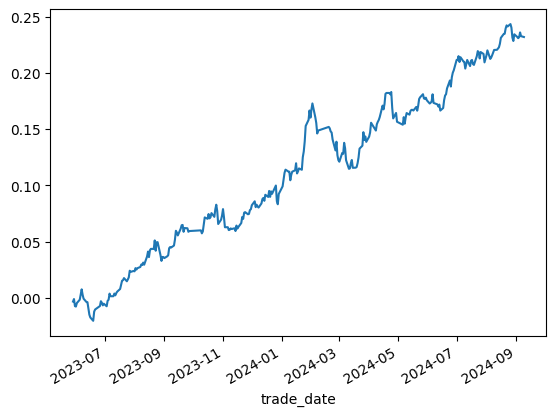

In [17]:
results.long_evaluate.returns_series.cumsum().plot()